<a href="https://colab.research.google.com/github/jouleffect/ML-Training/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esercizio dataset Iris


---

Problema di **Classificazione Multilabel**

---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

### Import del dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AI/Esercizi/Python/dataset/IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 5)

### Raggruppamento del dataset per "species"

In [ ]:
dgroup = data.groupby('species')
print(dgroup.size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Istogramma

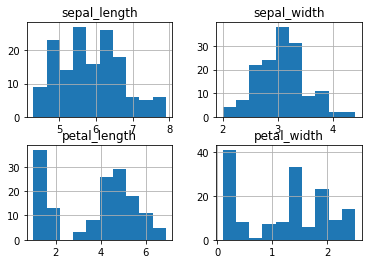

In [ ]:
data.hist()
plt.show()

### Conversione dei valori numerici in matrice numpy, dividendo le features con le prime colonne e l'ultima (labels)

In [ ]:
dIris = data.to_numpy()
datasetIris = dIris[:,0:4]
labelIris = dIris[:,4]

encoder = LabelEncoder()
labelIris = encoder.fit_transform(labelIris)

### Grafico scatter matrix

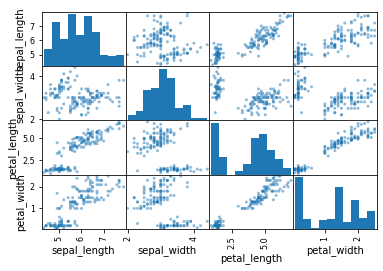

In [ ]:
pd.plotting.scatter_matrix(data)
plt.show()

### Scatter matrix colorato

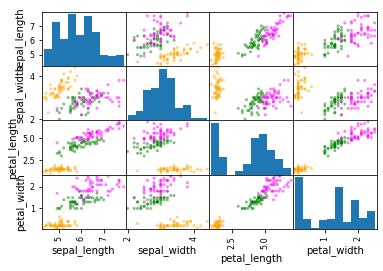

In [ ]:
colMap = {0:"orange",1:"green",2:"magenta"}
colori = list(map(lambda x:colMap.get(x),labelIris))
pd.plotting.scatter_matrix(data,diagonal='hist',c=colori)
plt.show()

### Correlazione

In [ ]:
correlaz = data.corr()
print(correlaz)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


### Grafico della correlazione

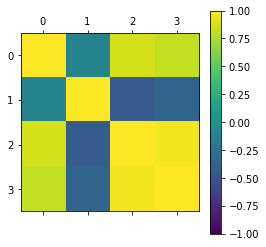

In [ ]:
plt.matshow(correlaz,vmin=-1,vmax=1)
plt.colorbar()
plt.show()

### Grafici

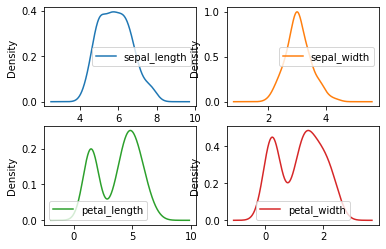

In [ ]:
data.plot(kind='density', subplots=True, layout=(2,2), sharex=False)
plt.show()

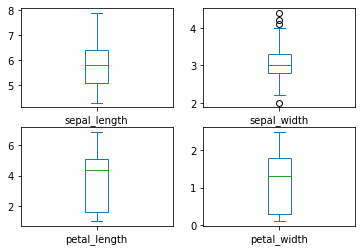

In [ ]:
data.plot(kind='box',subplots=True,layout=(2,2),sharex=False)
plt.show()

## Modelli

### Split del dataset in Train e Test

In [ ]:
from sklearn.model_selection import train_test_split

X = datasetIris
y = labelIris
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

### Perceptron

0.7111111111111111


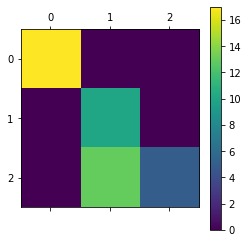

[[17  0  0]
 [ 0 10  0]
 [ 0 13  5]]


In [ ]:
from sklearn.linear_model import Perceptron

model = Perceptron(random_state=0)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

score = model.score(X_test,y_test)
print(score)

c_matrix = confusion_matrix(y_test,y_pred)

plt.matshow(c_matrix)
plt.colorbar()
plt.show()


print(c_matrix)

### Logistic Regression

0.9777777777777777


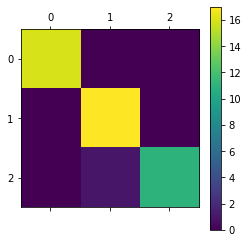

[[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

score = model.score(X_test,y_test)
print(score)

c_matrix = confusion_matrix(y_test,y_pred)

plt.matshow(c_matrix)
plt.colorbar()
plt.show()

print(c_matrix)


### SVM
SVC

0.9777777777777777


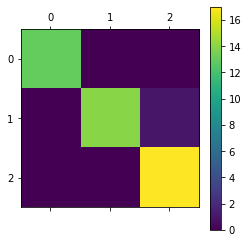

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear',C=1.0,random_state=0)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

score = model.score(X_test,y_test)
print(score)

c_matrix = confusion_matrix(y_test,y_pred)

plt.matshow(c_matrix)
plt.colorbar()
plt.show()

### Suddivisione in kfold del dataset
---
### GaussianNB

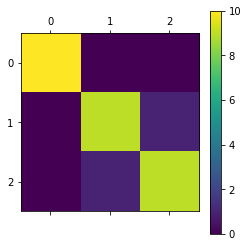

Accuracy:0.9333333333333333


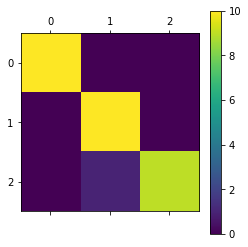

Accuracy:0.9666666666666667


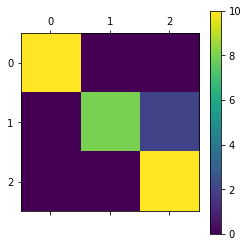

Accuracy:0.9333333333333333


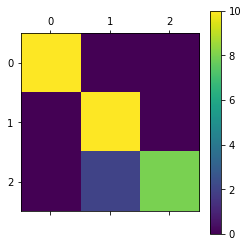

Accuracy:0.9333333333333333


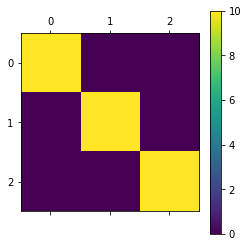

Accuracy:1.0


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(5)

for trainIndex, testIndex in kfold.split(datasetIris,labelIris):
  X_train = datasetIris[trainIndex]
  y_train = labelIris[trainIndex]

  model = GaussianNB()
  model.fit(X_train, y_train)

  X_test = datasetIris[testIndex]
  y_test = labelIris[testIndex]

  y_pred = model.predict(X_test)

  c_matrix = confusion_matrix(y_test,y_pred)
  #print(c_matrix)

  plt.matshow(c_matrix)
  plt.colorbar()
  plt.show()

  score = accuracy_score(y_test,y_pred)
  print('Accuracy:{}'.format(score))